In [2]:
#Import relevant libraries
import pandas as pd

In [4]:
#Import SENSE and EPA datasets for Beltsville
epa_data = pd.read_csv('md_beltsville.csv')
mask = epa_data['Sample Measurement'] < 0
epa_data = epa_data[~mask]
epa_data['Time Local']

0        0:00
1        1:00
2        2:00
3        3:00
4        4:00
5        5:00
6        6:00
7        7:00
8        8:00
9        9:00
10      10:00
11      11:00
12      12:00
13      13:00
14      14:00
15      15:00
16      16:00
17      17:00
18      18:00
19      19:00
20      20:00
21      21:00
22      22:00
23      23:00
24       0:00
25       1:00
26       2:00
27       3:00
28       4:00
29       5:00
        ...  
6403    18:00
6404    19:00
6405    20:00
6406    21:00
6407    22:00
6408    23:00
6409     0:00
6410     1:00
6411     2:00
6412     3:00
6413     4:00
6414     5:00
6415     6:00
6416     7:00
6417     8:00
6418     9:00
6419    10:00
6420    11:00
6421    12:00
6422    13:00
6423    14:00
6424    15:00
6425    16:00
6426    17:00
6427    18:00
6428    19:00
6429    20:00
6430    21:00
6431    22:00
6432    23:00
Name: Time Local, Length: 6383, dtype: object

In [3]:
#Drop columns that are not required
drop = ['Parameter Code', 'POC', 'Datum', 'Date GMT', 'Time GMT', 'Date of Last Change']
epa_data.drop(drop, axis = 1, inplace = True)

In [1]:
#Remove PM 2.5 values that are less than 0
pm_data = pd.read_csv('beltsville.csv')
mask1 = pm_data['PM25'] < 0
pm_data = pm_data[~mask1]

NameError: name 'pd' is not defined

In [5]:
#Verify that everything is correct
pm_data.describe()

,PM25
count,6648.000000
mean,12.713588
std,19.021282
min,0.000000
25%,4.350000
50%,8.580000
75%,15.712500
max,463.510000


In [6]:
#Rename column
pm_data.rename(columns = {'data_time': 'Date Time'}, inplace = True)

In [7]:
#Function for setting all time values so that they contain 4 digits 
import datetime

def add_x(x):
    if (len(x) == 4):
        return '0' + x
    else:
        return x
    

In [8]:
#Applying the function to the Time column
epa_data['Time Local'] = epa_data['Time Local'].apply(lambda x: add_x(x))

In [9]:
# Mergin time and date columns
epa_data['Date Time'] = (epa_data['Date Local'] + " " + epa_data['Time Local'])

In [10]:
# Converting the date time column to an actual date time value
epa_data['Date Time'] = epa_data['Date Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M'))

In [11]:
pm_data['Date Time'] = pm_data['Date Time'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [12]:
# Merging two datasets in order to do comparison
merged = pd.merge(epa_data, pm_data, on='Date Time')

In [13]:
merged.head()

,State Code,County Code,Site Num,Latitude,Longitude,Parameter Name,Date Local,Time Local,Sample Measurement,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date Time,PM25
0,24,33,30,39.055277,-76.878333,PM2.5 - Local Conditions,5/31/2019,15:00,5,Micrograms/cubic meter (LC),5,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,Maryland,Prince George's,2019-05-31 15:00:00,5.12
1,24,33,30,39.055277,-76.878333,PM2.5 - Local Conditions,5/31/2019,16:00,4,Micrograms/cubic meter (LC),5,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,Maryland,Prince George's,2019-05-31 16:00:00,5.61
2,24,33,30,39.055277,-76.878333,PM2.5 - Local Conditions,5/31/2019,17:00,7,Micrograms/cubic meter (LC),5,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,Maryland,Prince George's,2019-05-31 17:00:00,5.17
3,24,33,30,39.055277,-76.878333,PM2.5 - Local Conditions,5/31/2019,18:00,6,Micrograms/cubic meter (LC),5,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,Maryland,Prince George's,2019-05-31 18:00:00,5.92
4,24,33,30,39.055277,-76.878333,PM2.5 - Local Conditions,5/31/2019,19:00,8,Micrograms/cubic meter (LC),5,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,Maryland,Prince George's,2019-05-31 19:00:00,5.79


In [14]:
#Calculating Error
merged['Error'] = merged['Sample Measurement'] - merged['PM25']

In [15]:
#Removing high error values from the table
mask = (merged['Error'] < 100) & (merged['Error'] > -100)
merged = merged[mask]

In [16]:
# Setting time as the index for the table
merged.index = merged['Date Time']

In [21]:
#Using rolling mean to create a new column
merged['SENSE'] = merged['PM25'].rolling(24).mean()

In [22]:
merged['EPA'] = merged['Sample Measurement'].rolling(24).mean()

In [23]:
#Remove null values
merged = merged[merged['EPA'].notna()]
merged = merged[merged['SENSE'].notna()]


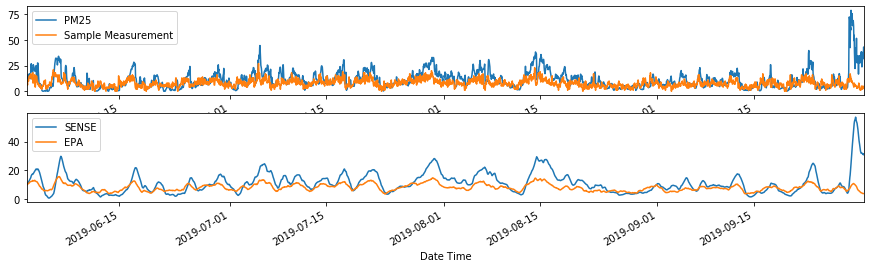

In [36]:
# Creating a plot with two subplots in it
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1)
#Plotting time vs values
merged.plot(x = "Date Time", y = ["PM25", "Sample Measurement"], figsize = (15,4), ax=axes[0])
merged.plot(x="Date Time", y=["SENSE", "EPA"], figsize = (15,4), ax=axes[1])